In [310]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("tamber/steam-video-games")
#print("Path to dataset files:", path)

# move the dataset to the local folder
#import shutil
#shutil.move(path, "dataset")

___
# 1

In [311]:
import pandas as pd

# Загрузка данных из CSV-файла
data = pd.read_csv('dataset/steam-200k.csv', header=None, names=['user_id', 'game_name', 'behavior', 'hours', '0'])

# Просмотр первых строк данных
data.head()

,user_id,game_name,behavior,hours,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    200000 non-null  int64  
 1   game_name  200000 non-null  object 
 2   behavior   200000 non-null  object 
 3   hours      200000 non-null  float64
 4   0          200000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [313]:
data.describe(include='all')

,user_id,game_name,behavior,hours,0
count,2.000000e+05,200000,200000,200000.000000,200000.0
unique,NaN,5155,2,NaN,NaN
top,NaN,Dota 2,purchase,NaN,NaN
freq,NaN,9682,129511,NaN,NaN
mean,1.036559e+08,NaN,NaN,17.874384,0.0
std,7.208074e+07,NaN,NaN,138.056952,0.0
min,5.250000e+03,NaN,NaN,0.100000,0.0
25%,4.738420e+07,NaN,NaN,1.000000,0.0
50%,8.691201e+07,NaN,NaN,1.000000,0.0
75%,1.542309e+08,NaN,NaN,1.300000,0.0


C:\Users\stepa\AppData\Local\Temp\ipykernel_8864\538247681.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_purchases.values, y=top10_purchases.index, palette='viridis')


Text(0.5, 1.0, 'Топ-10 самых популярных игр по количеству покупок')

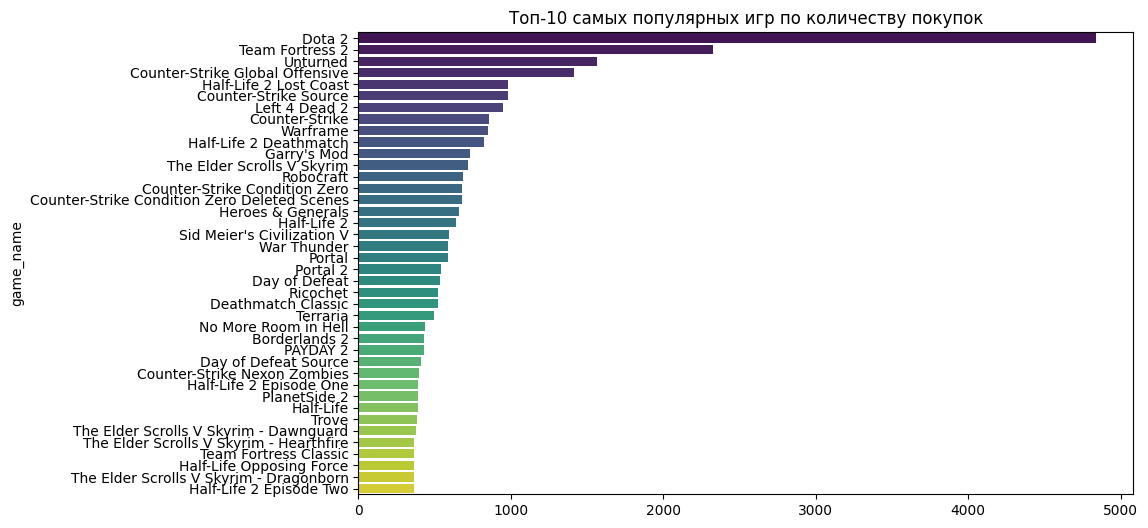

In [314]:
#Грфик распределения самых популярных игр по суммарному количеству покупок (behavior = 'purchase')
import matplotlib.pyplot as plt
import seaborn as sns

# Выборка данных по покупкам
purchases = data[data['behavior'] == 'purchase']

# Подсчет количества покупок каждой игры
purchases_count = purchases['game_name'].value_counts()

# Топ-10 самых популярных игр
top10_purchases = purchases_count.head(40)

# График
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_purchases.values, y=top10_purchases.index, palette='viridis')
plt.title('Топ-10 самых популярных игр по количеству покупок')


<Axes: xlabel='hours', ylabel='game_name'>

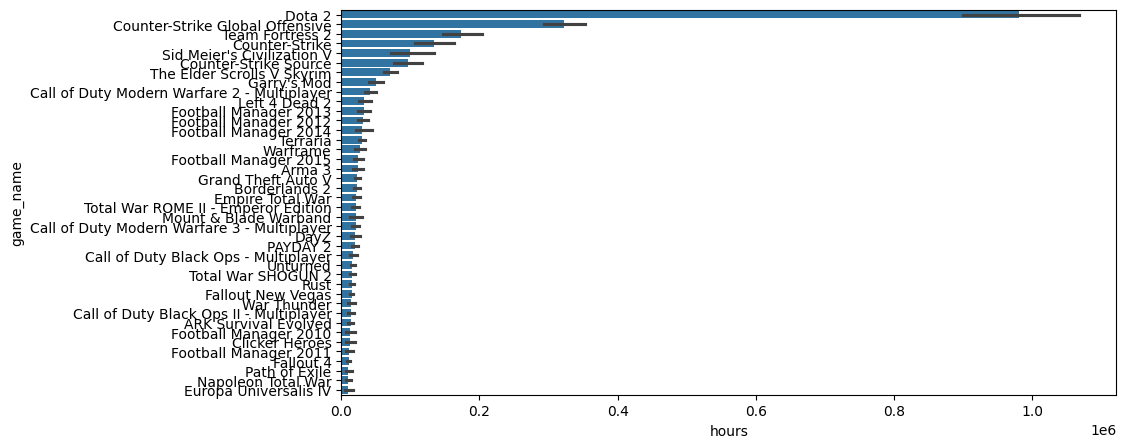

In [315]:
#Грфик распределения самых популярных игр по суммарному времени игры (behavior = 'play')
plt.figure(figsize=(10, 5))
sns.barplot(y='game_name', x='hours', data=data[data['behavior'] == 'play'], estimator=sum, order=data[data['behavior'] == 'play'].groupby('game_name')['hours'].sum().sort_values(ascending=False).iloc[:40].index)

C:\Users\stepa\AppData\Local\Temp\ipykernel_8864\184835983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hours_category', data=data, palette='viridis')


Text(0.5, 1.0, 'Распределение количества часов игры')

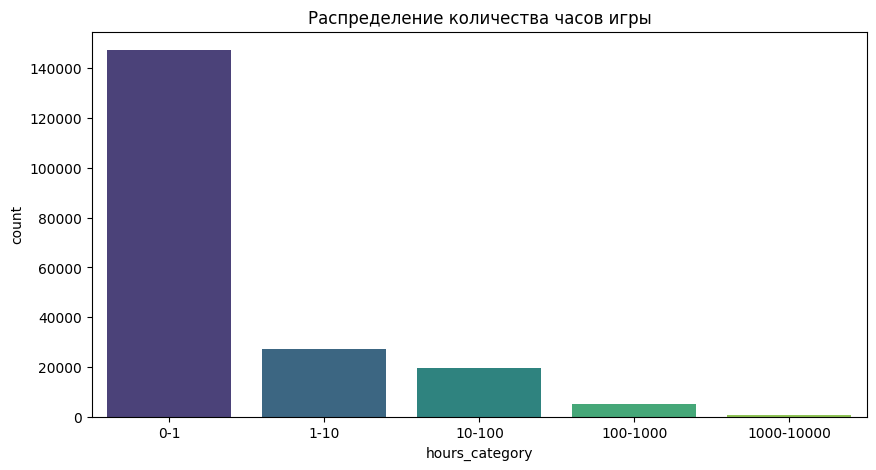

In [316]:
# Разобьем количесвто часов на категории и посмотрим на распределение
data['hours_category'] = pd.cut(data['hours'], bins=[0, 1, 10, 100, 1000, 10000], labels=['0-1', '1-10', '10-100', '100-1000', '1000-10000'])
plt.figure(figsize=(10, 5))
sns.countplot(x='hours_category', data=data, palette='viridis')
plt.title('Распределение количества часов игры')

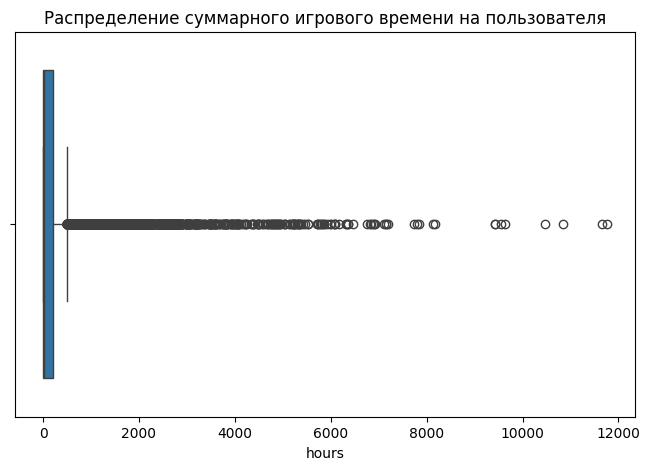

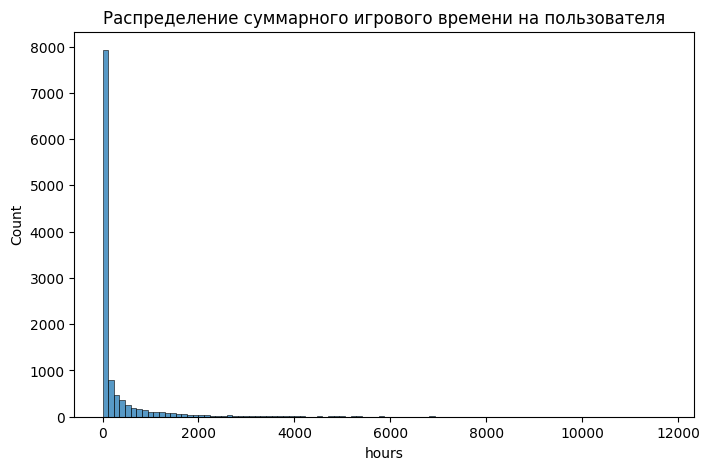

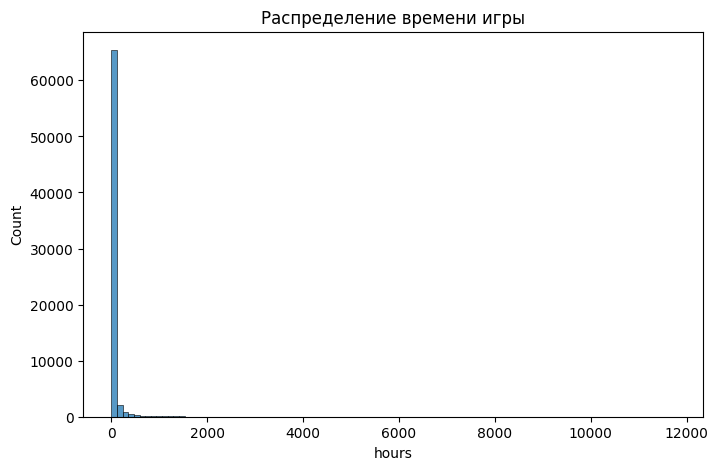

In [317]:
# Среднее время игры по пользователям
user_play_time = data[data["behavior"] == "play"].groupby("user_id")["hours"].sum()

# Boxplot времени игры на одного пользователя
plt.figure(figsize=(8, 5))
sns.boxplot(x=user_play_time)
plt.title("Распределение суммарного игрового времени на пользователя")
plt.show()

# Посмотрим на распределение времени игры на пользователя
plt.figure(figsize=(8, 5))
sns.histplot(user_play_time, bins=100)
plt.title("Распределение суммарного игрового времени на пользователя")
plt.show()

#Распределение время на игру
plt.figure(figsize=(8, 5))
sns.histplot(data[data['behavior'] == 'play']['hours'], bins=100)
plt.title('Распределение времени игры')
plt.show()





In [318]:
# Процент игр которые купили, но не играли
purchased_games = data[data['behavior'] == 'purchase']['game_name'].unique()
played_games = data[data['behavior'] == 'play']['game_name'].unique()
purchased_not_played = len(set(purchased_games) - set(played_games)) / len(purchased_games) * 100
print(f"Процент игр, которые купили, но не играли: {purchased_not_played:.2f}%")

Процент игр, которые купили, но не играли: 30.16%


### Анализ
1. Топ популярных игр по сумме покупок не всегда соответсвуют топу игр по часам
2. Первые топ 10 игр по часам отвечают за достаточно большую часть общих наигранных часоа, по покупкам перекос не такой большой, но все еще есть
3. Распрежеление суммарно игрового времени на пользователя похоже на экспоненциальное, большая часть пользователей не играет больше 2000 часов
4. В 30 процентов купленных игр не играли вообще

___
# 2

С имеющиимися данными можно провести коллаборативную фильтрацию, в данных имеются связи пользователя и игры 2я способами - покупка и проведенное время

___
# 3

С имеющимися данными можно решать задачи построения рекомендательных систем для пользователей, также можно предсказывать количество проведенных часов в игре для пользователя.
___
# 4

Есть выбросы по времени в игре в виде рдких очень больших значений, их нет смысла выбрасывать так как просто потеряем информацию, но мы можем установить верхний порог, который позволит более корректно делать численные предсказания количества часов

In [319]:
df = data.copy()

In [320]:
df.drop('0', axis=1, inplace=True)
df.drop('hours_category', axis=1, inplace=True)

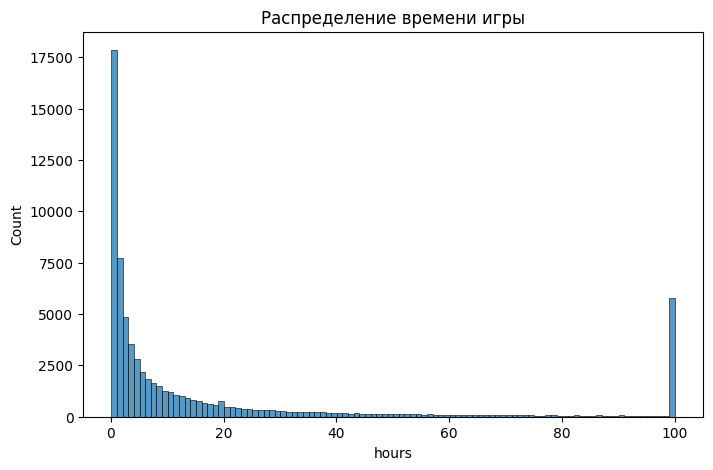

In [ ]:
# Для значений больше 100 часов установим значение 100
df.loc[data['hours'] > 100, 'hours'] = 100

#Распределение время на игру
plt.figure(figsize=(8, 5))
sns.histplot(df[df['behavior'] == 'play']['hours'], bins=100)
plt.title('Распределение времени игры')
plt.show()

___
# 5

In [304]:
import surprise
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, KNNBasic, BaselineOnly, NMF
from surprise.model_selection import train_test_split


In [326]:
df_play = df[df['behavior'] == 'play']
df_purchase = df[df['behavior'] == 'purchase']
data_play = data[data['behavior'] == 'play']
data_play.drop('0', axis=1, inplace=True)
data_play.drop('hours_category', axis=1, inplace=True)

C:\Users\stepa\AppData\Local\Temp\ipykernel_8864\4294469571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_play.drop('0', axis=1, inplace=True)
C:\Users\stepa\AppData\Local\Temp\ipykernel_8864\4294469571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_play.drop('hours_category', axis=1, inplace=True)


In [327]:
df_play.head()

,user_id,game_name,behavior,hours
1,151603712,The Elder Scrolls V Skyrim,play,100.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [328]:
df_purchase.head()

,user_id,game_name,behavior,hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
2,151603712,Fallout 4,purchase,1.0
4,151603712,Spore,purchase,1.0
6,151603712,Fallout New Vegas,purchase,1.0
8,151603712,Left 4 Dead 2,purchase,1.0


In [329]:
data_play.head()

,user_id,game_name,behavior,hours
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [336]:
# Предсказываем покупку игры
reader = Reader(rating_scale=(0, 100))
data_play = Dataset.load_from_df(df_play[['user_id', 'game_name', 'hours']], reader)

In [267]:
cross_validate(BaselineOnly(), data_play, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    26.3210 25.7549 25.8128 25.8283 25.7887 25.9011 0.2114  
MAE (testset)     18.4384 18.2164 18.1340 18.1112 18.2146 18.2229 0.1157  
Fit time          0.16    0.16    0.17    0.19    0.18    0.17    0.01    
Test time         0.03    0.03    0.03    0.03    0.03    0.03    0.00    


{'test_rmse': array([26.32099436, 25.75494527, 25.81283154, 25.82826225, 25.78870781]),
 'test_mae': array([18.43835206, 18.21639677, 18.13402229, 18.1112002 , 18.21460264]),
 'fit_time': (0.16370272636413574,
  0.15517067909240723,
  0.17164039611816406,
  0.18578243255615234,
  0.1798720359802246),
 'test_time': (0.027327775955200195,
  0.03353762626647949,
  0.030790328979492188,
  0.02974867820739746,
  0.031126022338867188)}

In [268]:
cross_validate(SVD(), data_play, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    26.6403 27.7653 27.1099 27.3019 86.7784 39.1192 23.8324 
MAE (testset)     18.5624 19.3127 18.7262 18.9384 81.6461 31.4372 25.1057 
Fit time          0.61    0.65    0.69    0.68    0.59    0.64    0.04    
Test time         0.05    0.05    0.07    0.44    0.05    0.13    0.15    


{'test_rmse': array([26.64034384, 27.76532031, 27.10987592, 27.30185219, 86.77844609]),
 'test_mae': array([18.56237919, 19.31268887, 18.72624218, 18.93835415, 81.64609627]),
 'fit_time': (0.6079421043395996,
  0.6454498767852783,
  0.6907346248626709,
  0.6770119667053223,
  0.5901846885681152),
 'test_time': (0.05477547645568848,
  0.04817557334899902,
  0.06514191627502441,
  0.43555450439453125,
  0.0543978214263916)}

In [269]:
cross_validate(KNNBasic(), data_play, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    28.0809 28.1857 28.3262 27.8916 28.6339 28.2237 0.2494  
MAE (testset)     18.2845 18.3473 18.4908 18.1185 18.6181 18.3718 0.1716  
Fit time          2.76    2.71    2.75    2.75    2.75    2.74    0.02    
Test time         1.72    1.77    1.62    1.61    1.92    1.73    0.11    


{'test_rmse': array([28.08093936, 28.18567235, 28.32623932, 27.89157752, 28.63389154]),
 'test_mae': array([18.28450434, 18.34728422, 18.49082292, 18.11848762, 18.61812892]),
 'fit_time': (2.760986089706421,
  2.7099995613098145,
  2.7489724159240723,
  2.751863956451416,
  2.747607707977295),
 'test_time': (1.723181962966919,
  1.7738871574401855,
  1.6195552349090576,
  1.607213020324707,
  1.91794753074646)}

In [270]:
cross_validate(NMF(), data_play, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    30.7313 30.2379 30.3732 30.0978 30.1911 30.3263 0.2212  
MAE (testset)     17.5097 16.9827 17.1641 16.9829 17.1052 17.1489 0.1936  
Fit time          1.88    1.90    1.85    1.82    1.79    1.85    0.04    
Test time         0.05    0.07    0.05    0.05    0.05    0.05    0.01    


{'test_rmse': array([30.73128104, 30.23787513, 30.37323537, 30.09775197, 30.1911158 ]),
 'test_mae': array([17.5097103 , 16.98271751, 17.16406429, 16.98290421, 17.10518947]),
 'fit_time': (1.8813319206237793,
  1.9029004573822021,
  1.8508410453796387,
  1.824470043182373,
  1.7903697490692139),
 'test_time': (0.05109357833862305,
  0.07255792617797852,
  0.04666757583618164,
  0.05215287208557129,
  0.04958987236022949)}

Построил модель для предсказания времени в игре для пользователей, в качестве модели выбрал NMF так как из смысла данных очевидно что время в игре не может быть отрицательным.

___
# 6

Для оценки можеди будем использовать стандартные метрики rmse и mae, модель имеет существенный перекос в предсказаниях в сторону меньшего игрового времени из за дизбаланса в обучающих данных.

In [337]:
trainset, testset = train_test_split(data_play, test_size=0.2)

algo = NMF()

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 30.1160
MAE:  17.0679


17.06793580630479

In [339]:
# Сравним предсказания с реальными значениями

# Получим предсказания для всех игр
predictions = algo.test(trainset.build_testset())

# Создадим датафрейм с предсказаниями
df_pred = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_pred

# uid - user id, iid - item id, rui - real rating, est - estimated rating

,uid,iid,rui,est,details
0,184584285,Rust,82.0,29.343032,{'was_impossible': False}
1,184584285,Unturned,2.7,0.955478,{'was_impossible': False}
2,209559315,BattleBlock Theater,1.0,0.412403,{'was_impossible': False}
3,209559315,Goat Simulator,1.4,0.589208,{'was_impossible': False}
4,209559315,Garry's Mod,3.4,1.244461,{'was_impossible': False}
...,...,...,...,...,...
56386,154316707,Dota 2,100.0,32.496812,{'was_impossible': False}
56387,282349848,Ragnarok,0.2,0.065719,{'was_impossible': False}
56388,225987202,Dota 2,3.8,1.233414,{'was_impossible': False}
56389,243998409,Dota 2,0.7,0.226939,{'was_impossible': False}


___
# 7

С помощью модели предсказания игрового времени можно, например, выделять самых напористых игроков чтобы таргетировать на них внутриигровую рекламу, предлагать какие нибудь покупки а также еще больше удерживать их в игре. Также на основе этого можно предлагать пользователям игры в которые они с высокой вероятностью поиграют, что позитивно отразится на из опыте с цифровым магазином.

В качестве бизнес метрик можно было бы измерять конверсию рекомендаций в покупки или средний объем внутриигровых транзакций.